
# Ley de los grandes números

Haremos una pequeña prueba empírica de esta ley, creando datos ficticios con ciertos parámetros que conocemos y luego tratando de aproximar esos parámetros usando muestras de distintos tamaños, para ver cómo el tamaño de la muestra influye en el error del cálculo de la media.

Primero crearemos una distribución que hará las veces de nuestra población. 
La población total consiste en 100.000 individuos. La función subyacente a la altura de estos individuos es una normal de media 1,70 mts y desvío estándar 0,10 mts. 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

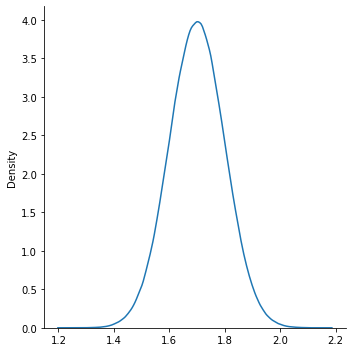

In [2]:
np.random.seed(42)

mu = 1.70
sigma = 0.10
N = int(1e6)
alturas = np.random.normal(mu, sigma, N) 

sns.displot(alturas, kind="kde")

Ahora imagina que desconoces la función subyacente. Como a menudo sucede en la vida real, no puedes conocer la altura de los 100.000 individuos que componen la población, y solamente puedes acceder a una muestra. 

¿Qué podría suceder si esta muestra es de 10 individuos?

Simularemos que tomamos a 10 individuos al azar de esta distribución.


In [11]:
#np.random.seed(42)

n10 = 10
muestra_10 = np.random.normal(mu, sigma, n10) 

# Observamos los datos
print("Los datos: ", muestra_10)

# Calculamos la media de la muestra
print(f"La media de esta muestra hipotética es de {np.mean(muestra_10):.2f}")

# Para saber cuáánto nos aproximamos a la media de la población, calculamos el error estándar

error_estandar_10 = np.std(muestra_10) / np.sqrt(n10)

print(f"Y su error estándar es de {np.mean(error_estandar_10):.2f}")

Los datos:  [1.67803281 1.73571126 1.8477894  1.64817298 1.61915064 1.6498243
 1.79154021 1.73287511 1.64702398 1.75132674]
La media de esta muestra hipotética es de 1.71
Y su error estándar es de 0.02


Puedes leer más acerca del cálculo del error estándar [aquí](https://es.wikipedia.org/wiki/Error_est%C3%A1ndar#Error_est%C3%A1ndar_de_la_media).

Ahora vamos a ver qué pasa si aumentamos el tamaño de la muestra. La Ley de los Grandes Números (y nuestra intuición) indica que debería disminuir el error.

In [29]:
#np.random.seed(42)

n100 = 100
muestra_100 = np.random.normal(mu, sigma, n100) 

error_estandar_100 = np.std(muestra_100) / np.sqrt(n100)

print(f"La media de esta muestra hipotética es de {np.mean(muestra_100):.2f}")

print(f"Y su error estándar es de {np.mean(error_estandar_100):.2f}")

La media de esta muestra hipotética es de 1.71
Y su error estándar es de 0.01


Por último, calculamos la media muestral sobre una muestra de 1.000 individuos y estimamos cuánto error hay con respecto a la media de la población.

In [41]:
#np.random.seed(42)

n1000 = 1000
muestra_1000 = np.random.normal(mu, sigma, n1000) 

error_estandar_1000 = np.std(muestra_100) / np.sqrt(n1000)

print(f"La media de esta muestra hipotética es de {np.mean(muestra_1000):.2f}")

print(f"Y su error estándar es de {np.mean(error_estandar_1000):.2f}")

La media de esta muestra hipotética es de 1.70
Y su error estándar es de 0.00


Nuevamente observamos que se reduce el error. Veamos algunos decimales más de este resultado para comprobar que no llegamos a calcular perfectamente la media poblacional aunque nos hayamos acercado bastante.


In [6]:
# Observamos el mismo resultado que antes, mostrando más posiciones decimales

print(f"La media de esta muestra hipotética es de {np.mean(muestra_1000):.5f}")

print(f"Y su error estándar es de {np.mean(error_estandar_1000):.5f}")

La media de esta muestra hipotética es de 1.70193
Y su error estándar es de 0.00286


In [74]:
ns = np.logspace(1,3.5,30)
medias = list()
muestras = list()
for n in ns:
    muestra = np.random.normal(mu, sigma, int(n))
    muestras.append(muestra)
    medias.append(np.mean(muestra))

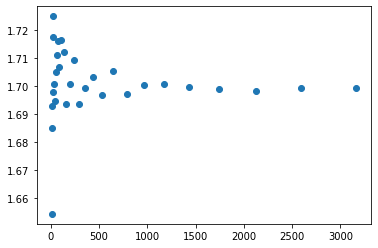

In [75]:
plt.scatter(ns, medias)

In [89]:
for muestra in muestras:
    std = np.std(muestra)
    datos = len(muestra)
    std_error = std / np.sqrt(datos)
    media = np.mean(muestra)
    std_media = std / media
    print(f'{media=:.4f}, {std_media=:.4f}, {std=:.4f}, {std_error=:.4f}, {datos=}')

media=1.6850, std_media=0.0508, std=0.0856, std_error=0.0271, datos=10
media=1.6544, std_media=0.0427, std=0.0706, std_error=0.0204, datos=12
media=1.6929, std_media=0.0443, std=0.0751, std_error=0.0201, datos=14
media=1.7175, std_media=0.0516, std=0.0886, std_error=0.0209, datos=18
media=1.6979, std_media=0.0568, std=0.0964, std_error=0.0206, datos=22
media=1.7250, std_media=0.0614, std=0.1059, std_error=0.0208, datos=26
media=1.7008, std_media=0.0693, std=0.1178, std_error=0.0208, datos=32
media=1.6948, std_media=0.0675, std=0.1144, std_error=0.0181, datos=40
media=1.7053, std_media=0.0573, std=0.0977, std_error=0.0141, datos=48
media=1.7112, std_media=0.0692, std=0.1185, std_error=0.0154, datos=59
media=1.7160, std_media=0.0604, std=0.1036, std_error=0.0122, datos=72
media=1.7069, std_media=0.0620, std=0.1058, std_error=0.0113, datos=88
media=1.7164, std_media=0.0532, std=0.0913, std_error=0.0088, datos=108
media=1.7124, std_media=0.0562, std=0.0962, std_error=0.0084, datos=132
medi

# Ejercicio 1

1. Escribe una función que simule el resultado de tirar un dado de 6 caras
2. La media de infinitas tiradas de dado es *(1 + 2 + 3 + 4 + 5 + 6)/6*. Almacena el resultado en una variable llamada media_teorica.
3. Ahora simula tirar el dado y calcular la media sobre el conjunto de las muestras que obtuvimos cada vez que agregamos una observación. La primera vez que arrojas el dado, calcula la media de esa observación. La segunda vez, calcula la media de las dos tiradas. Y así hasta llegar a 1.000 observaciones. Guárdalas en una variable llamada media_observada
4. En un mismo gráfico, grafica la media_teorica y la media_observada. La media_teorica será constante mientras que la media_observada tomará distintos valores a medida que aumentan los ensayos. Observa su cambio.

In [90]:
# 1. Es una funcion que devuelve nros del 1 al 6 de forma equiprobable, se puede hacer con una variable

dado=np.random.choice([1,2,3,4,5,6])
print(dado)


3


In [91]:
#2.
media_teorica=(1+2+3+4+5+6)/6
print(media_teorica)

3.5


In [92]:
#3. armo funcion que tira el dado N veces. Por simplicidad, calculo la media para distintos N

def dado(N):
    tirada=np.zeros(N)

    for i in range(N):
        tirada[i]=np.random.choice([1,2,3,4,5,6])

    return tirada  


3.5
3.4839


(array([1678., 1658., 1714., 1670., 1657., 1623.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

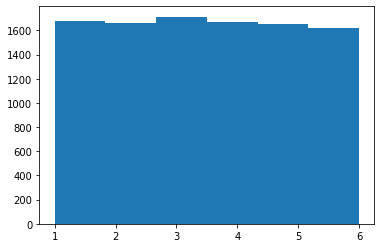

In [96]:
t10=dado(10)
m10=np.mean(t10)

t1000=dado(10000)
m1000=np.mean(t1000)

print(m10)
print(m1000)

plt.hist(t1000, bins=6)

In [97]:
#4 armo funcion que calcula la media a medida que hace cada observacion

def evolucion_media(datos):
    medias=np.zeros(len(datos))

    for i in range(len(datos)):
        di=datos[0:i]
        medias[i]=np.mean(di)

    return medias   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'promedio')

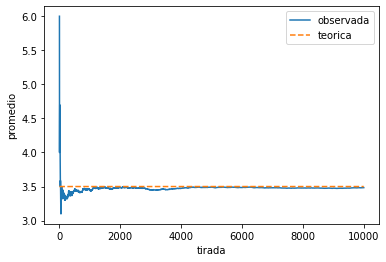

In [98]:
medias=evolucion_media(t1000)
media_teo=media_teorica*np.ones(len(medias))
plt.plot(medias,label='observada')
plt.plot(media_teo,'--',label='teorica')
plt.legend()
plt.xlabel('tirada')
plt.ylabel('promedio')

# Ejercicio 2

1. Genera datos sintéticos que simulen el resultado de realizar 5,000 mediciones de PH sobre una variable normal de media 5,75 y desvío estándar 0,75. 
2. Transforma los puntajes a puntajes Z.
3. Grafica los puntajes Z utilizando el parámetro kde de la función displot de seaborn.


(array([  15.,  121.,  414.,  948., 1379., 1204.,  657.,  221.,   37.,
           4.]),
 array([3.21180639, 3.75039712, 4.28898784, 4.82757856, 5.36616929,
        5.90476001, 6.44335073, 6.98194146, 7.52053218, 8.0591229 ,
        8.59771363]),
 <BarContainer object of 10 artists>)

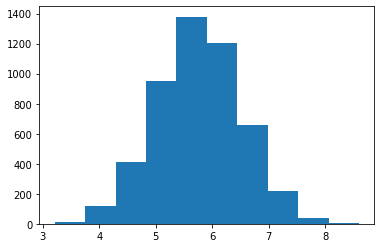

In [99]:
# 1.
mu=5.75
sigma=0.75
N=5000
datos=np.random.normal(mu,sigma,N)
plt.hist(datos)

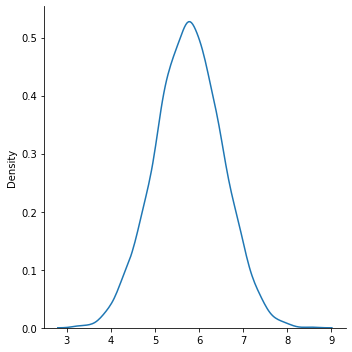

In [100]:
sns.displot(datos, kind="kde")

In [102]:
min(datos)

3.211806394361293

In [103]:
max(datos)

8.597713626582085

In [104]:
np.mean(datos)

5.76184035903187

(array([  15.,  121.,  414.,  948., 1379., 1204.,  657.,  221.,   37.,
           4.]),
 array([-3.37979125, -2.66594812, -1.952105  , -1.23826188, -0.52441875,
         0.18942437,  0.9032675 ,  1.61711062,  2.33095375,  3.04479687,
         3.75864   ]),
 <BarContainer object of 10 artists>)

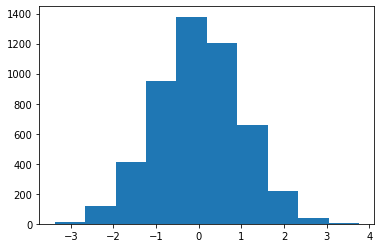

In [105]:
#2. 
#calculamos media y desviación de la muestra y luego, Z
media=np.mean(datos)
desvio=np.std(datos)

Z=(datos-media)/desvio
plt.hist(Z)

In [106]:
datos_centrados = datos - media

In [107]:
print(f'{np.mean(datos)=}')
print(f'{np.mean(datos_centrados)=}')

np.mean(datos)=5.76184035903187
np.mean(datos_centrados)=6.679101716144942e-17


<AxesSubplot:ylabel='Density'>

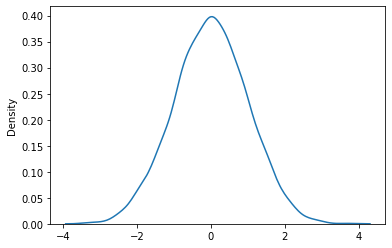

In [108]:
#3
sns.kdeplot(data=Z)

In [ ]:
Z=(datos-media)/desvio

In [ ]:
Z * desvio = datos - media

In [ ]:
Z * desvio + media = dato

In [109]:
-2 * desvio + media

4.252851326068239

In [111]:
def Z(X, mu, sigma):
    return ((X - mu) / sigma)

In [112]:
def Z_inversa(Z, mu, sigma):
    return ((Z * sigma) + media)

In [115]:
media

5.76184035903187

In [117]:
Z(5.7618, media, desvio)

-5.349148468098472e-05

In [118]:
Z_inversa(-2, media, desvio)

4.252851326068239